In [1]:
import pandas as pd
import numpy as np
# 能展示图表,不好用
# %matplotlib inline
#from pyecharts.charts import Line

In [2]:
df = pd.DataFrame({'A':['f','b','f','b','f','b','f','f'],
                  'B':['one','one','two','three','two','two','one','three'],
                  'C':np.random.randn(8),
                  'D':np.random.randn(8)
                  })
df

,A,B,C,D
0,f,one,-0.247854,-0.542021
1,b,one,-0.315730,-0.854549
2,f,two,0.779105,0.966973
3,b,three,-1.334499,-2.536904
4,f,two,-0.777272,-0.724431
5,b,two,0.401475,-0.108743
6,f,one,1.213224,1.435186
7,f,three,1.207381,-1.437918


In [3]:
# 分组求和
df.groupby('A').sum()

,B,C,D
A,,,
b,onethreetwo,-1.248753,-3.500196
f,onetwotwoonethree,2.174584,-0.302211


In [4]:
# 多个列的统计,A,B构成二级索引
df.groupby(['A','B']).mean()

C         D
A B                        
b one   -0.315730 -0.854549
  three -1.334499 -2.536904
  two    0.401475 -0.108743
f one    0.482685  0.446583
  three  1.207381 -1.437918
  two    0.000917  0.121271

In [5]:
# 不让A,B变成索引
df.groupby(["A","B"], as_index = False).mean()

,A,B,C,D
0,b,one,-0.315730,-0.854549
1,b,three,-1.334499,-2.536904
2,b,two,0.401475,-0.108743
3,f,one,0.482685,0.446583
4,f,three,1.207381,-1.437918
5,f,two,0.000917,0.121271


In [6]:
# 同时查看多种数据统计
df.groupby('A').agg({"C":[np.sum, np.mean, np.std]})

C:\Users\THE KEY\AppData\Local\Temp\ipykernel_13464\3112930286.py:2: FutureWarning: The provided callable <function sum at 0x00000271DEE85940> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.groupby('A').agg({"C":[np.sum, np.mean, np.std]})
C:\Users\THE KEY\AppData\Local\Temp\ipykernel_13464\3112930286.py:2: FutureWarning: The provided callable <function mean at 0x00000271DEE86A20> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('A').agg({"C":[np.sum, np.mean, np.std]})
C:\Users\THE KEY\AppData\Local\Temp\ipykernel_13464\3112930286.py:2: FutureWarning: The provided callable <function std at 0x00000271DEE86B60> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To k

C                    
        sum      mean       std
A                              
b -1.248753 -0.416251  0.872342
f  2.174584  0.434917  0.902289

In [7]:
# 查看单列的统计
df.groupby('A')["C"].agg([np.sum,np.mean,np.std])

C:\Users\THE KEY\AppData\Local\Temp\ipykernel_13464\1976062110.py:2: FutureWarning: The provided callable <function sum at 0x00000271DEE85940> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.groupby('A')["C"].agg([np.sum,np.mean,np.std])
C:\Users\THE KEY\AppData\Local\Temp\ipykernel_13464\1976062110.py:2: FutureWarning: The provided callable <function mean at 0x00000271DEE86A20> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('A')["C"].agg([np.sum,np.mean,np.std])
C:\Users\THE KEY\AppData\Local\Temp\ipykernel_13464\1976062110.py:2: FutureWarning: The provided callable <function std at 0x00000271DEE86B60> is currently using SeriesGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep cu

,sum,mean,std
A,,,
b,-1.248753,-0.416251,0.872342
f,2.174584,0.434917,0.902289


In [8]:
# 不同列使用不同的聚合函数
df.groupby('A').agg({"C":np.mean,"D":np.sum})

C:\Users\THE KEY\AppData\Local\Temp\ipykernel_13464\653605253.py:2: FutureWarning: The provided callable <function mean at 0x00000271DEE86A20> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.groupby('A').agg({"C":np.mean,"D":np.sum})
C:\Users\THE KEY\AppData\Local\Temp\ipykernel_13464\653605253.py:2: FutureWarning: The provided callable <function sum at 0x00000271DEE85940> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df.groupby('A').agg({"C":np.mean,"D":np.sum})


,C,D
A,,
b,-0.416251,-3.500196
f,0.434917,-0.302211


### -------------------------------------------------

In [9]:
g = df.groupby('A')
g

In [10]:
for name,group in g:
    print(name)
    print(group)
    print()

b
   A      B         C         D
1  b    one -0.315730 -0.854549
3  b  three -1.334499 -2.536904
5  b    two  0.401475 -0.108743

f
   A      B         C         D
0  f    one -0.247854 -0.542021
2  f    two  0.779105  0.966973
4  f    two -0.777272 -0.724431
6  f    one  1.213224  1.435186
7  f  three  1.207381 -1.437918



In [11]:
# 获得单独分组的数据
g.get_group('b')

,A,B,C,D
1,b,one,-0.315730,-0.854549
3,b,three,-1.334499,-2.536904
5,b,two,0.401475,-0.108743


In [12]:
g = df.groupby(['A','B'])
g

In [13]:
for name,group in g:
    print(name)
    print(group)
    print()

('b', 'one')
   A    B        C         D
1  b  one -0.31573 -0.854549

('b', 'three')
   A      B         C         D
3  b  three -1.334499 -2.536904

('b', 'two')
   A    B         C         D
5  b  two  0.401475 -0.108743

('f', 'one')
   A    B         C         D
0  f  one -0.247854 -0.542021
6  f  one  1.213224  1.435186

('f', 'three')
   A      B         C         D
7  f  three  1.207381 -1.437918

('f', 'two')
   A    B         C         D
2  f  two  0.779105  0.966973
4  f  two -0.777272 -0.724431



In [14]:
g.get_group(('f','three'))

,A,B,C,D
7,f,three,1.207381,-1.437918


In [15]:
g["C"]

In [16]:
for name,group in g["C"]:
    print(name)
    print(group)
    print(type(group))
    print()

('b', 'one')
1   -0.31573
Name: C, dtype: float64
<class 'pandas.core.series.Series'>

('b', 'three')
3   -1.334499
Name: C, dtype: float64
<class 'pandas.core.series.Series'>

('b', 'two')
5    0.401475
Name: C, dtype: float64
<class 'pandas.core.series.Series'>

('f', 'one')
0   -0.247854
6    1.213224
Name: C, dtype: float64
<class 'pandas.core.series.Series'>

('f', 'three')
7    1.207381
Name: C, dtype: float64
<class 'pandas.core.series.Series'>

('f', 'two')
2    0.779105
4   -0.777272
Name: C, dtype: float64
<class 'pandas.core.series.Series'>



### ------------------------------------------------------------

### 实例

In [17]:
fpath = "C:/Users/THE KEY/Desktop/python_datum/pandas/data/weather/weather_beijing.xlsx"
wea = pd.read_excel(fpath)
wea.loc[:,'最高温'] = wea['最高温'].str.replace("°","").astype(int)
wea.loc[:,'最低温'] = wea['最低温'].str.strip("°")
# 手动标注两个特殊值
wea.loc[[0],"最低温"] = '-7'
wea.loc[[455],"最低温"] = '0'
wea.loc[:,'最低温'] = wea['最低温'].astype(int)
wea.head()

,日期,最高温,最低温,天气,风力风向,空气质量指数
0,2011-01-01 周六,-2,-7,多云~阴,无持续风向微风,NaN
1,2011-01-02 周日,-2,-7,多云,无持续风向微风,NaN
2,2011-01-03 周一,-2,-6,多云~阴,西北风~北风3-4级~4-5级,NaN
3,2011-01-04 周二,-2,-9,晴,北风5-6级,NaN
4,2011-01-05 周三,-2,-10,晴,北风~无持续风向3-4级~微风,NaN


In [18]:
wea["月份"] = wea["日期"].str[0:7]
wea.head()

,日期,最高温,最低温,天气,风力风向,空气质量指数,月份
0,2011-01-01 周六,-2,-7,多云~阴,无持续风向微风,NaN,2011-01
1,2011-01-02 周日,-2,-7,多云,无持续风向微风,NaN,2011-01
2,2011-01-03 周一,-2,-6,多云~阴,西北风~北风3-4级~4-5级,NaN,2011-01
3,2011-01-04 周二,-2,-9,晴,北风5-6级,NaN,2011-01
4,2011-01-05 周三,-2,-10,晴,北风~无持续风向3-4级~微风,NaN,2011-01


In [19]:
# 查看每个月最高温
data = wea.groupby('月份')["最低温"].min()
data = data[0:12]
type(data)

pandas.core.series.Series

<Axes: xlabel='月份'>

D:\Anaconda\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
D:\Anaconda\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 20221 (\N{CJK UNIFIED IDEOGRAPH-4EFD}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
D:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 20221 (\N{CJK UNIFIED IDEOGRAPH-4EFD}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


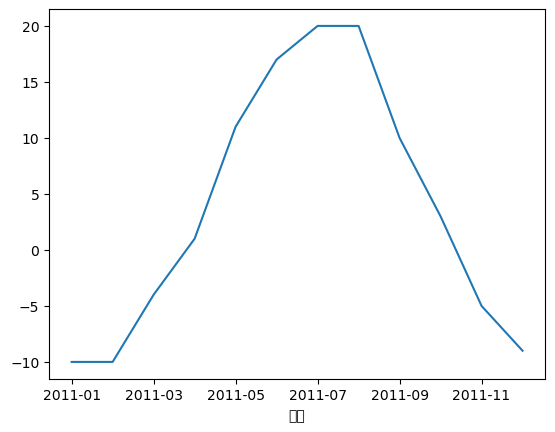

In [20]:
data.plot()

In [21]:
# 多个数据统计
group_data = wea.groupby("月份").agg({"最高温":np.max,"最低温":np.min})
group_data = group_data[0:12]
group_data

C:\Users\THE KEY\AppData\Local\Temp\ipykernel_13464\902455431.py:2: FutureWarning: The provided callable <function max at 0x00000271DEE86020> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  group_data = wea.groupby("月份").agg({"最高温":np.max,"最低温":np.min})
C:\Users\THE KEY\AppData\Local\Temp\ipykernel_13464\902455431.py:2: FutureWarning: The provided callable <function min at 0x00000271DEE86160> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  group_data = wea.groupby("月份").agg({"最高温":np.max,"最低温":np.min})


,最高温,最低温
月份,,
2011-01,7,-10
2011-02,11,-10
2011-03,22,-4
2011-04,28,1
2011-05,33,11
2011-06,36,17
2011-07,35,20
2011-08,35,20
2011-09,30,10


<Axes: xlabel='月份'>

D:\Anaconda\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
D:\Anaconda\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 20221 (\N{CJK UNIFIED IDEOGRAPH-4EFD}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
D:\Anaconda\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 26368 (\N{CJK UNIFIED IDEOGRAPH-6700}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
D:\Anaconda\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 39640 (\N{CJK UNIFIED IDEOGRAPH-9AD8}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
D:\Anaconda\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 28201 (\N{CJK UNIFIED IDEOGRAPH-6E29}) missing from font(s) DejaVu Sans.
  func(*args, **kwargs)
D:\Anaconda\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 20302 (\N{CJK UNIFIED IDEOGRAPH-4F4E}) missing from font(s)

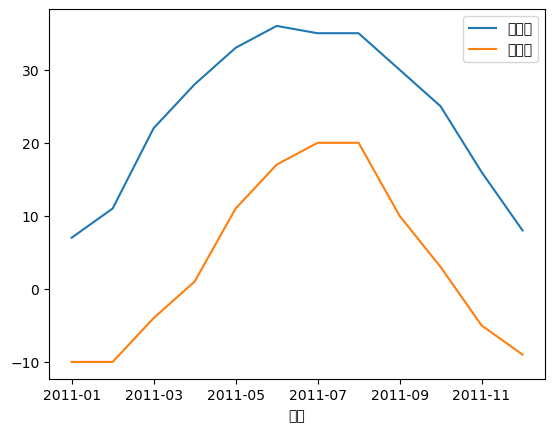

In [22]:
group_data.plot()